In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [186]:
df = pd.read_csv('Life Expectancy Data.csv')

In [187]:
df.shape

(2938, 22)

In [188]:
import pandas as pd
from sklearn.impute import SimpleImputer


# List of columns with null values
nullColmDict = ['Life expectancy ', 'Adult Mortality', 'Alcohol',
                'percentage expenditure', 'Hepatitis B', ' BMI ', 'Polio',
                'Total expenditure', 'Diphtheria ', 'GDP', 'Population',
                ' thinness  1-19 years', ' thinness 5-9 years',
                'Income composition of resources', 'Schooling']

# Create the imputer for the 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Apply imputer to each column in the list
for column in nullColmDict:
    df[column] = imputer.fit_transform(df[[column]])

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [190]:
df['Life expectancy ']

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

In [191]:
#df.groupby('Country')['Life expectancy '].mean().sort_values(ascending=False)
#df.sort_values(by='Alcohol', ascending=True)

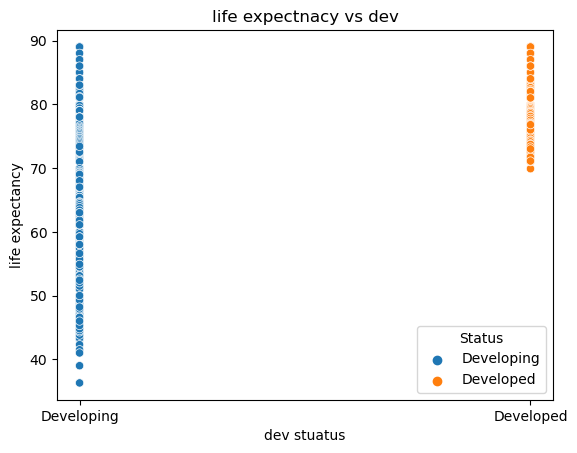

In [192]:
sns.scatterplot(data=df, x='Status', y='Life expectancy ', hue='Status')
plt.xlabel('dev stuatus')
plt.ylabel('life expectancy')
plt.title('life expectnacy vs dev')
plt.show()

In [195]:
df.dtypes

Country                              int32
Year                                 int64
Status                               int32
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [194]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Status'] = le.fit_transform(df['Status'])
df['Country'] = le.fit_transform(df['Country'])
df['Country'].value_counts()

Country
0      16
132    16
121    16
122    16
123    16
       ..
124     1
146     1
117     1
142     1
49      1
Name: count, Length: 193, dtype: int64